In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib as mat
from tabulate import tabulate

In [2]:
df=pd.read_excel('C://Users/user/DS1_C5_S1_Income_Data_Challenge.xlsx')
df

,Age,WorkClass,Education,Education_Num,Marital_Status,Occupation,Relationship,Gender,Hours_Per_Week,Native_Country,Income_Bracket
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,40,United-States,<=50K
1,50,Self-emp,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,Female,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Male,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,Female,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,Male,20,United-States,<=50K


In [4]:
#Task1
df.columns

Index(['Age', 'WorkClass', 'Education', 'Education_Num', 'Marital_Status',
       'Occupation', 'Relationship', 'Gender', 'Hours_Per_Week',
       'Native_Country', 'Income_Bracket'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   WorkClass       32561 non-null  object
 2   Education       32561 non-null  object
 3   Education_Num   32561 non-null  int64 
 4   Marital_Status  32561 non-null  object
 5   Occupation      32561 non-null  object
 6   Relationship    32561 non-null  object
 7   Gender          32561 non-null  object
 8   Hours_Per_Week  32561 non-null  int64 
 9   Native_Country  32561 non-null  object
 10  Income_Bracket  32561 non-null  object
dtypes: int64(3), object(8)
memory usage: 2.7+ MB


In [5]:
df.isnull().sum()

Age               0
WorkClass         0
Education         0
Education_Num     0
Marital_Status    0
Occupation        0
Relationship      0
Gender            0
Hours_Per_Week    0
Native_Country    0
Income_Bracket    0
dtype: int64

In [21]:
#Task2
def data_type_check(df):
    num=[]
    cat=[]
    for col in df.columns:
        if df[col].dtype == object:
            cat.append(col)
        else:
            num.append(col)
    return num,cat

In [22]:
num,cat=data_type_check(df)
table=[num,cat]
print(tabulate ({"Numerical":num,"Categorical":cat},headers=['Numerical','Categorical']))

Numerical       Categorical
--------------  --------------
Age             WorkClass
Education_Num   Education
Hours_Per_Week  Marital_Status
                Occupation
                Relationship
                Gender
                Native_Country
                Income_Bracket


In [23]:
#Task3
def info_of_cat(col):
    print(f" The unique values of {col} is: {df[col].unique()}")
    print(f" The mode of {col} is: {df[col].mode()[0]}")
    print(f" The count of missing values of {col} are: {df[col].isnull().sum()}")

In [24]:
#Task4
info_of_cat('WorkClass')

 The unique values of WorkClass is: [' State-gov' 'Self-emp' ' Private' ' Federal-gov' ' Local-gov' ' ?'
 ' Self-emp' ' Without-pay' ' Never-worked']
 The mode of WorkClass is:  Private
 The count of missing values of WorkClass are: 0


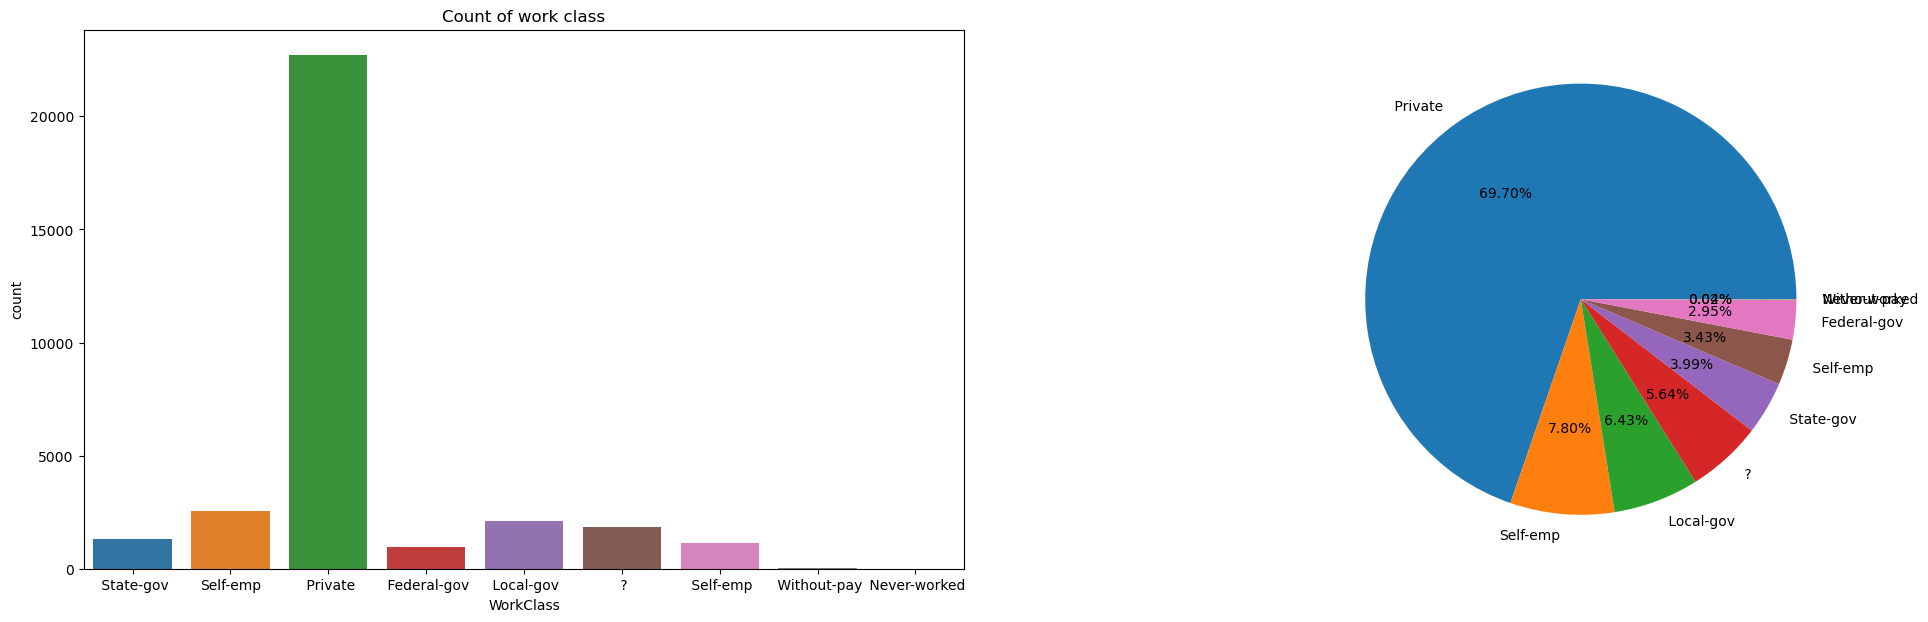

In [3]:
fig,ax =plt.subplots(1,2,figsize=(25,7))
ax[0].set_title('Count of work class')
data=df['WorkClass'].value_counts()
lbl=data.keys()
sb.countplot(x=df['WorkClass'],ax=ax[0])
plt.pie(data,labels=lbl,autopct='%0.2f%%')
plt.show()

The working class of individuals are mostly private ie. more than 20000.

In [57]:
info_of_cat('Education')

 The unique values of Education is: [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
 The mode of Education is:  HS-grad
 The count of missing values of Education are: 0


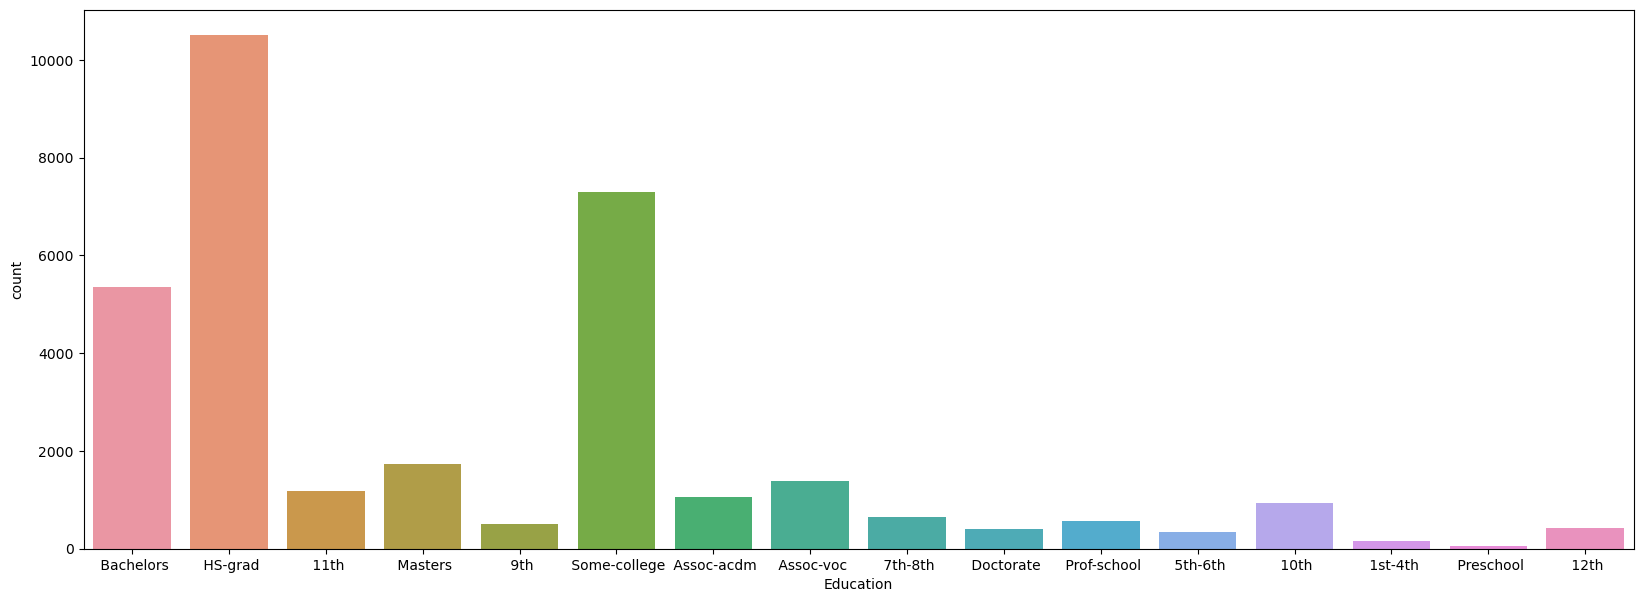

In [6]:
fig,ax=plt.subplots(figsize=(20,7))
sb.countplot(x=df['Education'])
plt.show()

Approx 23k individuals have The education qualification of individuals are high school gradutes, bachelors or some are college students. Majority of them belongs to these education backgrounds.

In [26]:
info_of_cat('Marital_Status')

 The unique values of Marital_Status is: [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
 The mode of Marital_Status is:  Married-civ-spouse
 The count of missing values of Marital_Status are: 0


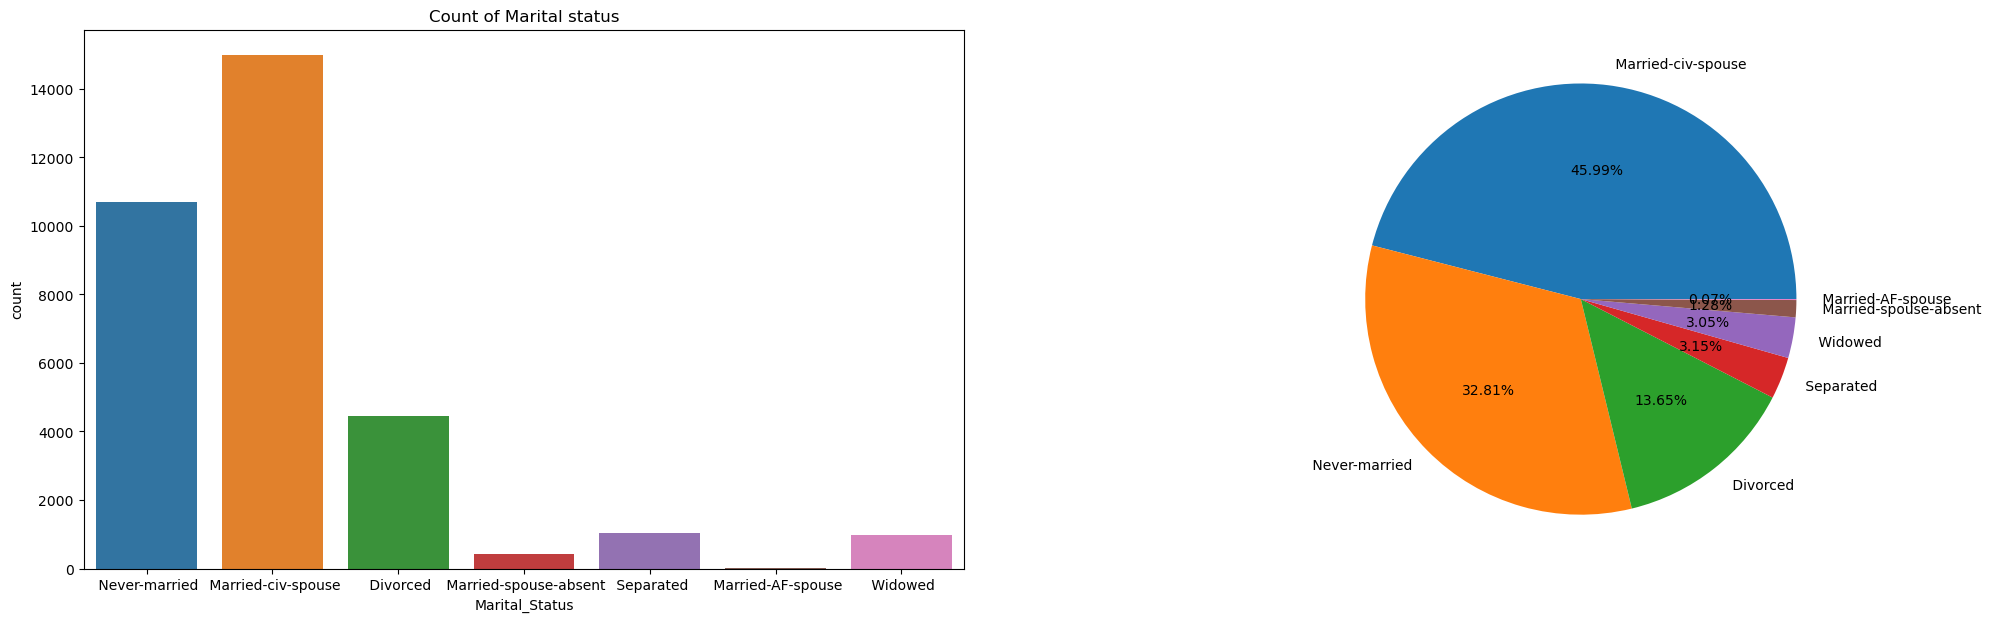

In [8]:
fig,ax=plt.subplots(1,2,figsize=(25,7))
ax[0].set_title('Count of Marital status')
data=df['Marital_Status'].value_counts()
lbl=data.keys()
sb.countplot(x=df['Marital_Status'],ax=ax[0])
plt.pie(data,labels=lbl,autopct='%0.2f%%')
plt.show()

There are more than 24k individuals who's marital status are either married and have civilian spouse or are unmarried.

In [28]:
info_of_cat('Occupation')

 The unique values of Occupation is: [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
 The mode of Occupation is:  Prof-specialty
 The count of missing values of Occupation are: 0


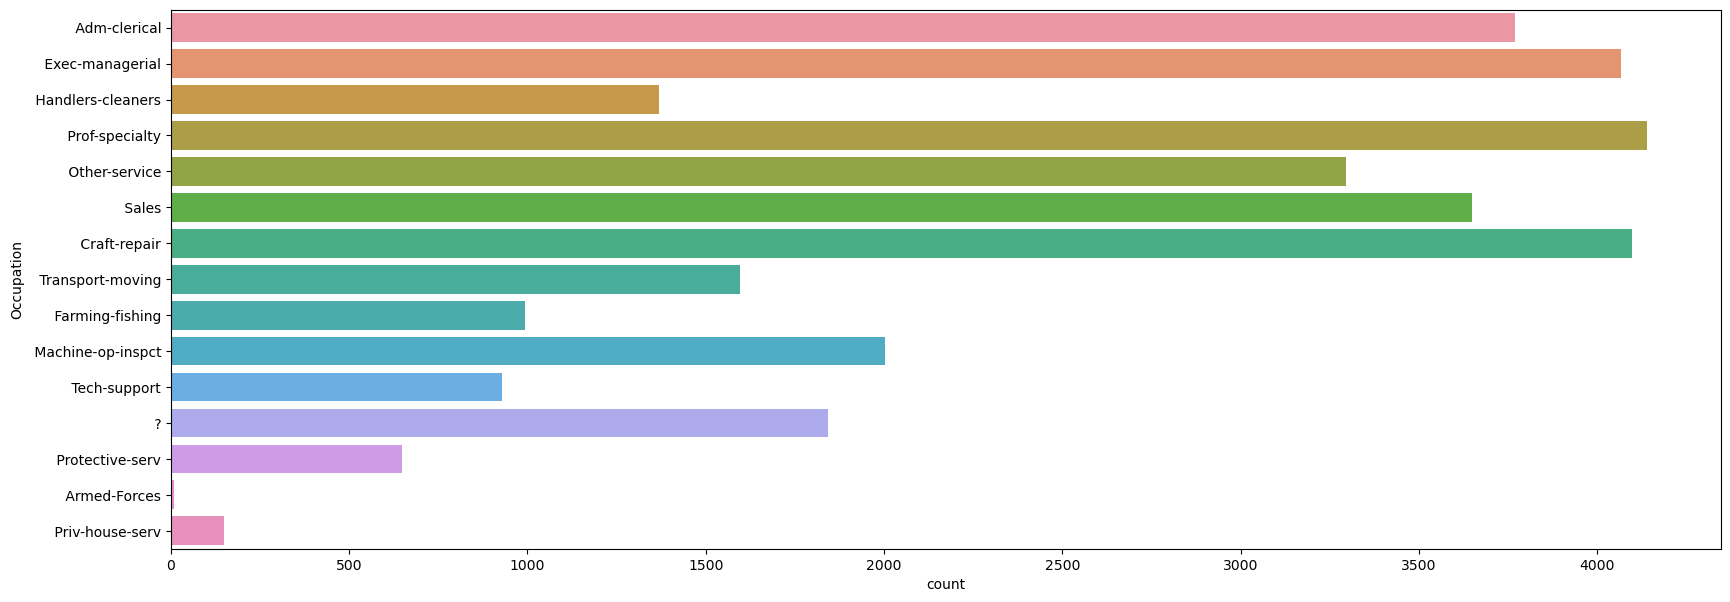

In [9]:
fig,ax=plt.subplots(figsize=(20,7))
sb.countplot(y=df['Occupation'])
plt.show()

The graph shows that these individuals have done different types of jobs. The majority of them have done adm-clerical, executive managerial, professor speciality, sales or the craft repair

In [30]:
info_of_cat('Relationship')

 The unique values of Relationship is: [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
 The mode of Relationship is:  Husband
 The count of missing values of Relationship are: 0


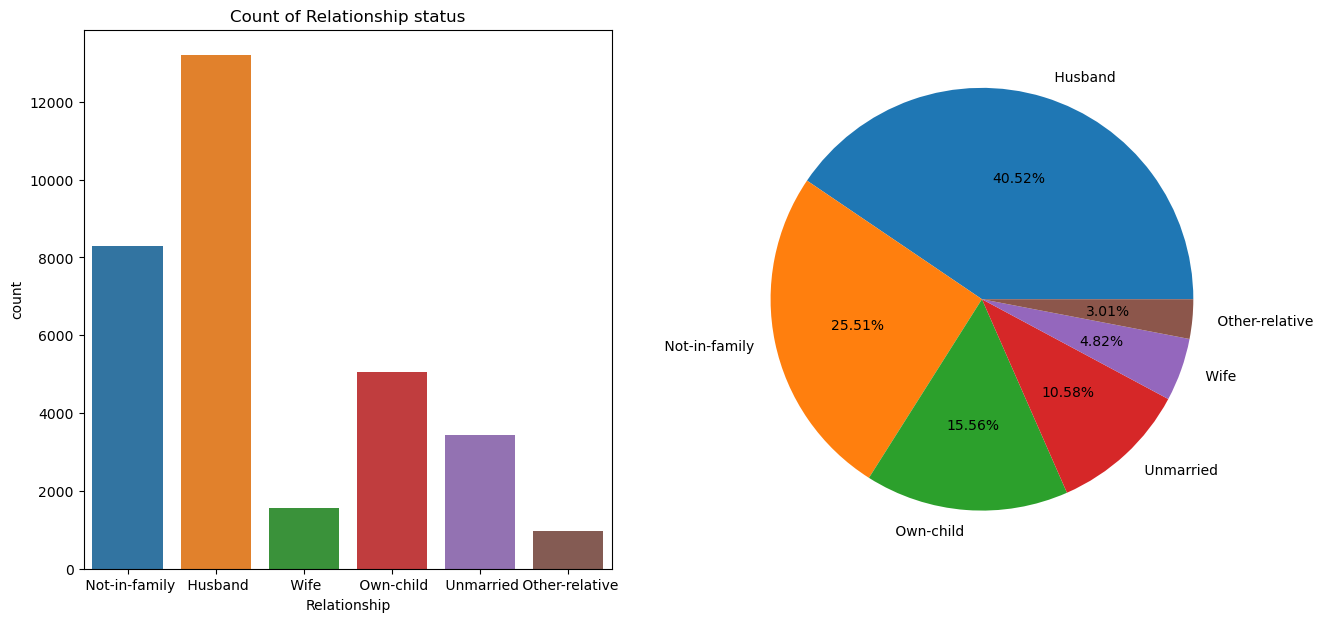

In [31]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
ax[0].set_title('Count of Relationship status')
data=df['Relationship'].value_counts()
lbl=data.keys()
sb.countplot(x=df['Relationship'],ax=ax[0])
plt.pie(data,labels=lbl,autopct='%0.2f%%')
plt.show()

Since most of the employees are married so they are husbands of their spouses whereas 26% have not lived with their family

In [32]:
info_of_cat('Gender')

 The unique values of Gender is: [' Male' ' Female']
 The mode of Gender is:  Male
 The count of missing values of Gender are: 0


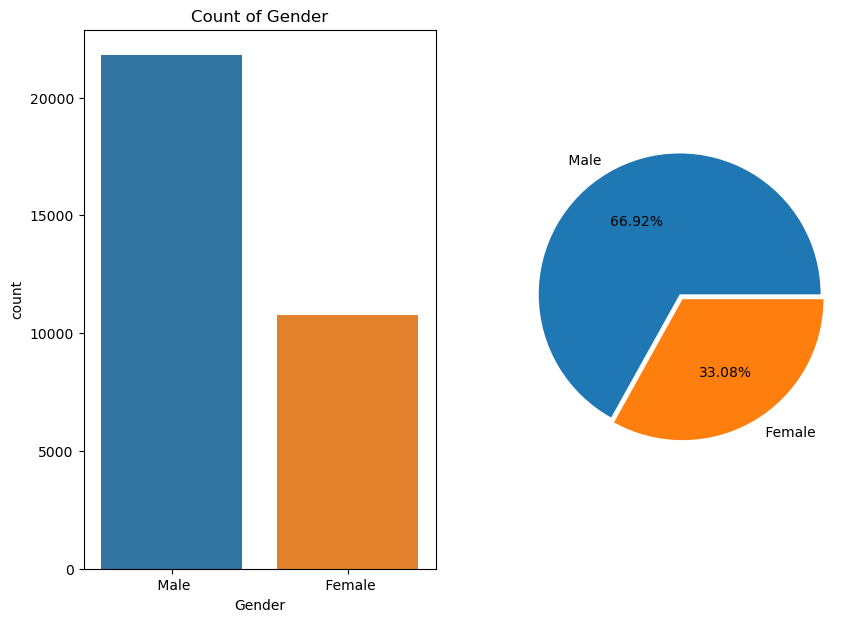

In [33]:
fig,ax=plt.subplots(1,2,figsize=(10,7))
ax[0].set_title('Count of Gender')
data=df['Gender'].value_counts()
lbl=data.keys()
sb.countplot(x=df['Gender'],ax=ax[0])
plt.pie(data,labels=lbl,autopct='%0.2f%%',explode=[0.04,0.0])
plt.show()

The company have more number of male employees as compared to female employees. In pie chart we can clearly see their distribution in the company

In [34]:
info_of_cat('Native_Country')

 The unique values of Native_Country is: [' United-States' ' Cuba' ' Jamaica' ' India' ' ?' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' ' Iran'
 ' Philippines' ' Italy' ' Poland' ' Columbia' ' Cambodia' ' Thailand'
 ' Ecuador' ' Laos' ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic'
 ' El-Salvador' ' France' ' Guatemala' ' China' ' Japan' ' Yugoslavia'
 ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland' ' Trinadad&Tobago'
 ' Greece' ' Nicaragua' ' Vietnam' ' Hong' ' Ireland' ' Hungary'
 ' Holand-Netherlands']
 The mode of Native_Country is:  United-States
 The count of missing values of Native_Country are: 0


In [35]:
# fig,ax=plt.subplots(1,2,figsize=(10,7))
# ax[0].set_title('Count of Native country')
# data=df['Native_Country'].value_counts()
# lbl=data.keys()
# sb.countplot(x=df['Native_Country'],ax=ax[0])
# plt.pie(data,labels=lbl,autopct='%0.2f%%')
# plt.show()

In [36]:
info_of_cat('Income_Bracket')

 The unique values of Income_Bracket is: [' <=50K' ' >50K']
 The mode of Income_Bracket is:  <=50K
 The count of missing values of Income_Bracket are: 0


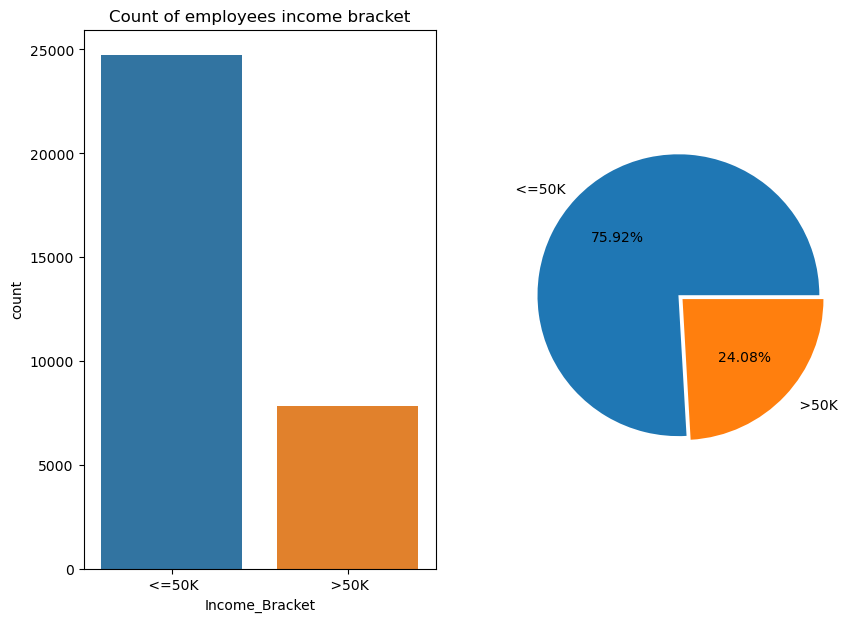

In [37]:
fig,ax=plt.subplots(1,2,figsize=(10,7))
ax[0].set_title('Count of employees income bracket')
data=df['Income_Bracket'].value_counts()
lbl=data.keys()
sb.countplot(x=df['Income_Bracket'],ax=ax[0])
plt.pie(data,labels=lbl,autopct='%0.2f%%',explode=[0.04,0.0])
plt.show()

There are naerly 75% of the employees who's salary is less than 50k while only 25% have their income greater than 50k

In [38]:
#Task5
def info_of_num(col):
    print(f" The mean of {col} is: {df[col].mean()}")
    print(f" The mode of {col} is: {df[col].mode()[0]}")
    print(f" The standard deviation of {col} is: {df[col].std()}")
    print(f" The count of missing values of {col} are: {df[col].isnull().sum()}")
    print(f" The kurtosis values of {col} is: {df[col].kurtosis()}")

In [39]:
info_of_num('Age')

 The mean of Age is: 38.58164675532078
 The mode of Age is: 36
 The standard deviation of Age is: 13.640432553581146
 The count of missing values of Age are: 0
 The kurtosis values of Age is: -0.16612745957143904


In [40]:
info_of_num('Hours_Per_Week')

 The mean of Hours_Per_Week is: 40.437455852092995
 The mode of Hours_Per_Week is: 40
 The standard deviation of Hours_Per_Week is: 12.34742868173081
 The count of missing values of Hours_Per_Week are: 0
 The kurtosis values of Hours_Per_Week is: 2.916686796002066


<AxesSubplot:xlabel='Age'>

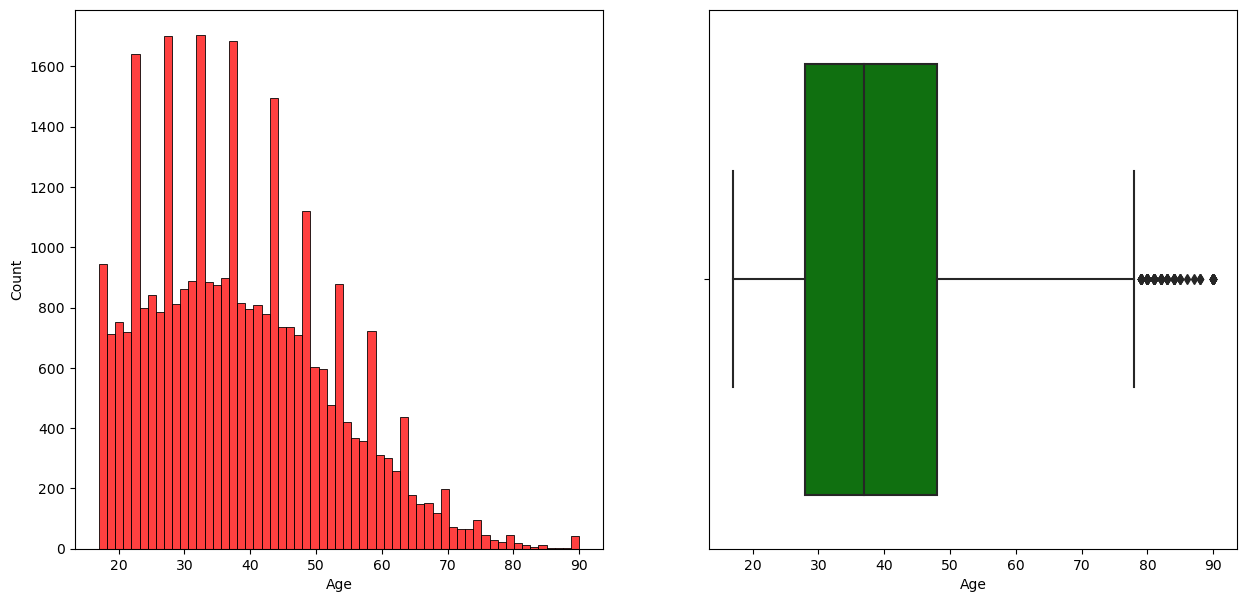

In [19]:
#Task6
fig,ax=plt.subplots(1,2,figsize=(15,7))
sb.histplot(x=df['Age'],ax=ax[0],color='r')
sb.boxplot(x=df['Age'],ax=ax[1],color='g')

The box plot or histogram shows the skewness in the data. The data is right skewed.There are outliers in the range greater than 80 years which shows the inconsistency in the data. We need to perform outlier treatment to remove it's inconsistency.

In [47]:
mean=int(df.Age.mean())
print(mean)
x=df[df['Age']>75].index
x

38


Int64Index([], dtype='int64')

In [48]:
for index in x:
    df.loc[index,'Age']=mean

<AxesSubplot:xlabel='Age'>

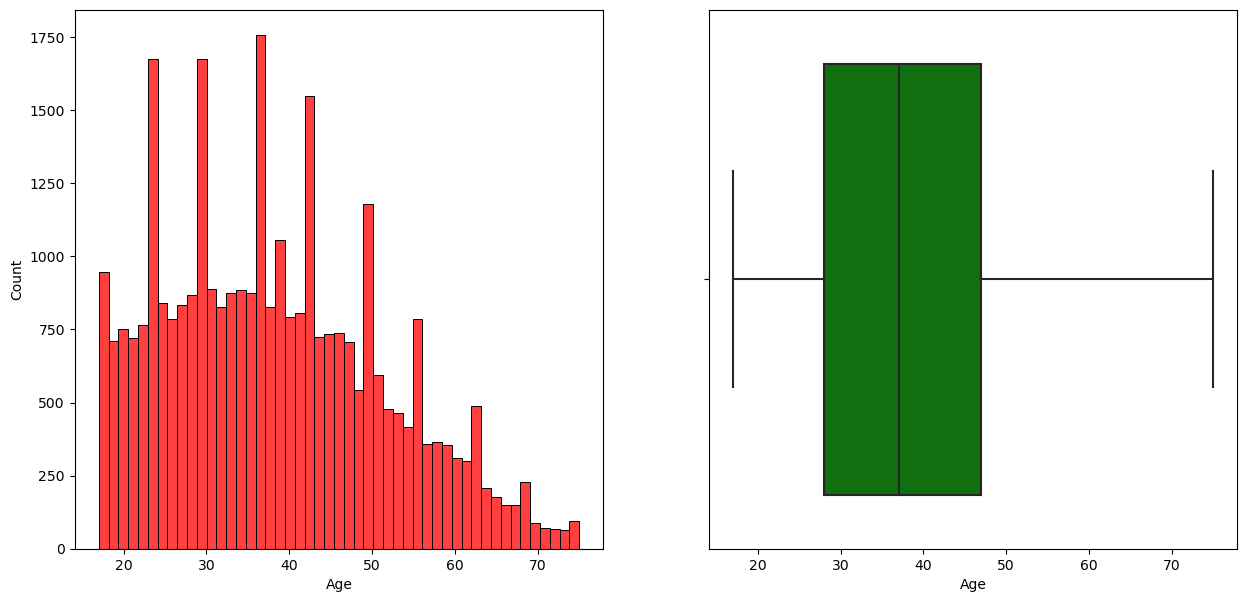

In [49]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
sb.histplot(x=df['Age'],ax=ax[0],color='r')
sb.boxplot(x=df['Age'],ax=ax[1],color='g')

The data after doing outlier treatment

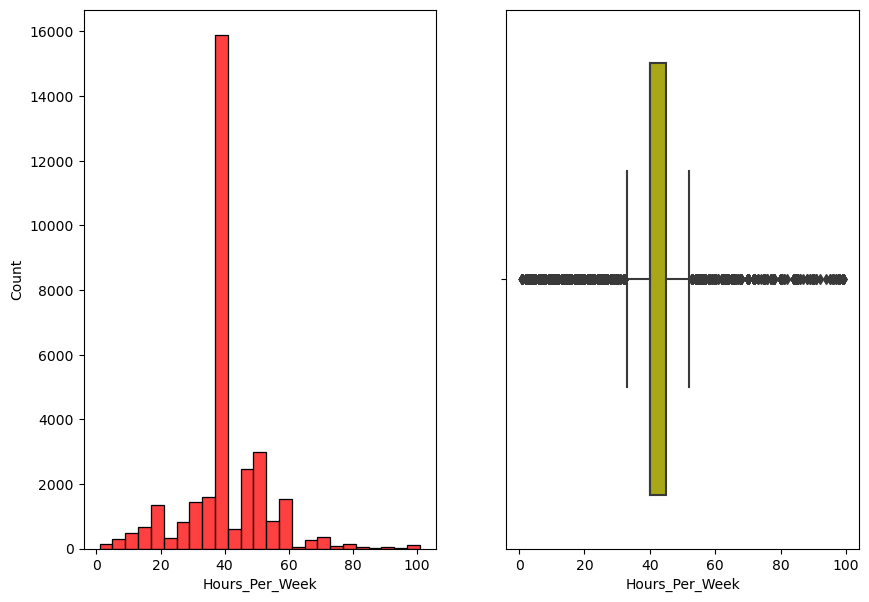

In [89]:
fig,ax=plt.subplots(1,2,figsize=(10,7))
sb.histplot(x=df['Hours_Per_Week'],ax=ax[0],color='r',binwidth=4)
sb.boxplot(x=df['Hours_Per_Week'],ax=ax[1],color='y')
plt.show()

Approx 16k individuals work nearly 40 hrs per week. The data is symmetrically distributed. There is no skewness because mean, median and mode are same.

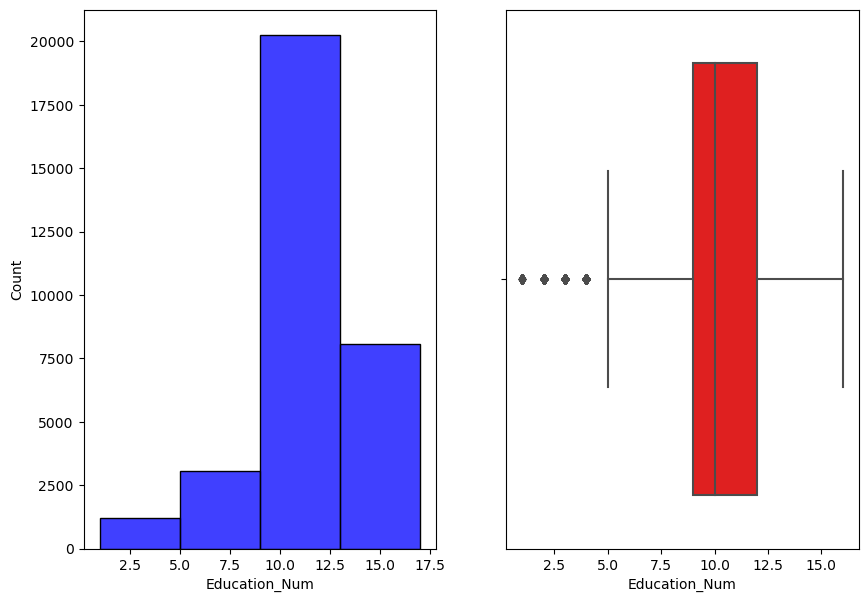

In [63]:
fig,ax=plt.subplots(1,2,figsize=(10,7))
sb.histplot(x=df['Education_Num'],ax=ax[0],color='b',binwidth=4)
sb.boxplot(x=df['Education_Num'],ax=ax[1],color='r')
plt.show()

The education number of individual lies between 10 to 12.5.Very few have number between 2.5 and 7.5 so we need to perform outlier analysis to remove the inconsistency in the data.

In [65]:
mean=int(df.Education_Num.mean())
print(mean)
i=df[df['Education_Num']<5].index
i

10


Int64Index([   15,    56,    61,    79,   160,   183,   195,   214,   221,
              224,
            ...
            32401, 32403, 32413, 32425, 32430, 32431, 32432, 32448, 32479,
            32517],
           dtype='int64', length=1198)

In [66]:
for ind in i:
    df.loc[ind,'Education_Num']=mean

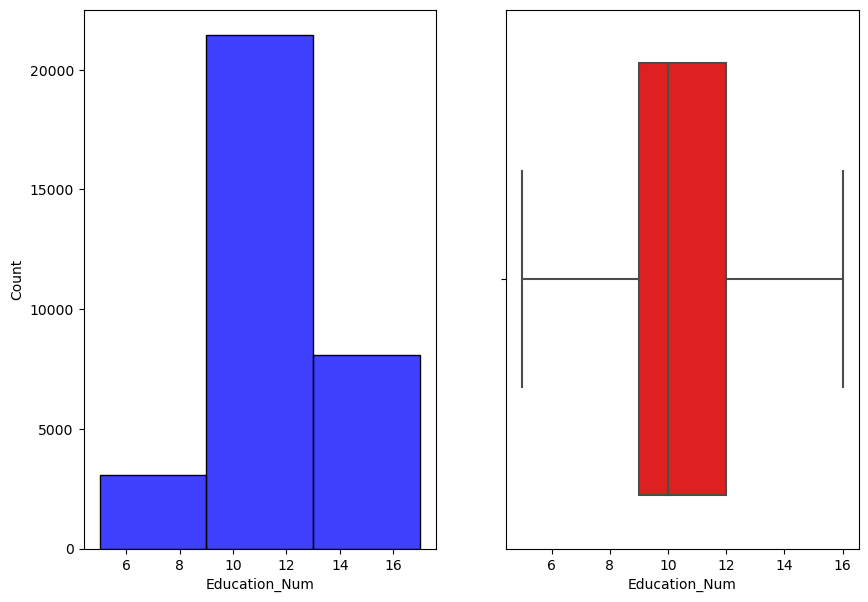

In [67]:
fig,ax=plt.subplots(1,2,figsize=(10,7))
sb.histplot(x=df['Education_Num'],ax=ax[0],color='b',binwidth=4)
sb.boxplot(x=df['Education_Num'],ax=ax[1],color='r')
plt.show()

Boxplot and histogram after removing the outliers